# SPOTIFY SONG ATTRIBUTES OF A USER :- 

## PART 1<BR>
## EXPLORATORY DATA ANALYSIS


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

### HOW THE DATASET SHAPES UP ?

In [2]:
df = pd.read_csv('spotify.csv')
df = df.iloc[:,1:]
raw = df
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(4), object(2)
memory usage: 252.2+ KB


 - There are non-null data
 - Datatypes : int and float

In [4]:
df = df.iloc[:,0:14]
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [5]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


 - Mean is not greater than median in all columns
 - Max > third quartile in all columns
 - There is a possibility of many outliers

In [6]:
print(df.target.unique())
df.target.value_counts()

[1 0]


1    1020
0     997
Name: target, dtype: int64

- Data is discrete with values 0 and 1 so it's a categorical data.
- So there are almost equally liked and disliked songs in the dataset

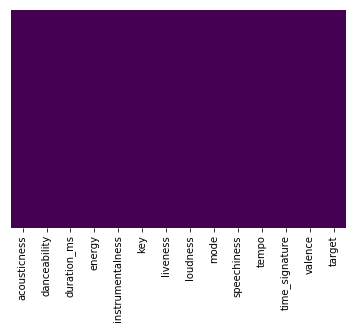

In [7]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

There are no missing values

### WHAT FEATURES ARE MOST OF THE SONGS MADE OF?

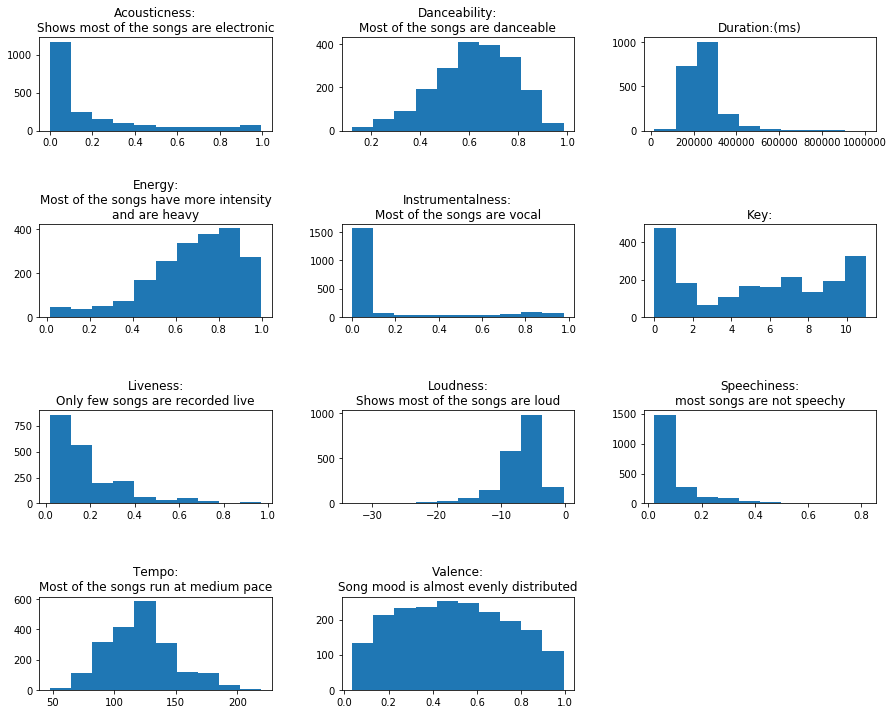

In [8]:
fig,axes = plt.subplots(4,3,figsize = (15,12))
plt.subplots_adjust(hspace = 1,wspace= 0.3)

#acousticness
axes[0,0].hist(df.acousticness.values)
axes[0,0].set_title("Acousticness:\nShows most of the songs are electronic")

#danceability
axes[0,1].set_title("Danceability:\nMost of the songs are danceable")
axes[0,1].hist(df.danceability.values)

#duration_ms
axes[0,2].set_title("Duration:(ms)")
axes[0,2].hist(df.duration_ms.values)

#energy
axes[1,0].set_title("Energy:\nMost of the songs have more intensity\nand are heavy")
axes[1,0].hist(df.energy.values)

#instrumentalness
axes[1,1].set_title("Instrumentalness:\nMost of the songs are vocal")
axes[1,1].hist(df.instrumentalness.values)

#key
axes[1,2].set_title("Key:")
axes[1,2].hist(df.key.values)

#liveness
axes[2,0].set_title("Liveness:\nOnly few songs are recorded live")
axes[2,0].hist(df.liveness.values)

#loudness
axes[2,1].set_title("Loudness:\nShows most of the songs are loud")
axes[2,1].hist(df.loudness.values)

#speechiness
axes[2,2].set_title("Speechiness:\nmost songs are not speechy")
axes[2,2].hist(df.speechiness.values)

#tempo
axes[3,0].set_title("Tempo:\nMost of the songs run at medium pace")
axes[3,0].hist(df.tempo.values)

#valence
axes[3,1].set_title("Valence:\nSong mood is almost evenly distributed")
axes[3,1].hist(df.valence.values)

#deleting extra axis
fig.delaxes(axes[3,2])
plt.show()

### CONSIDERING ONLY THE LIKED SONGS

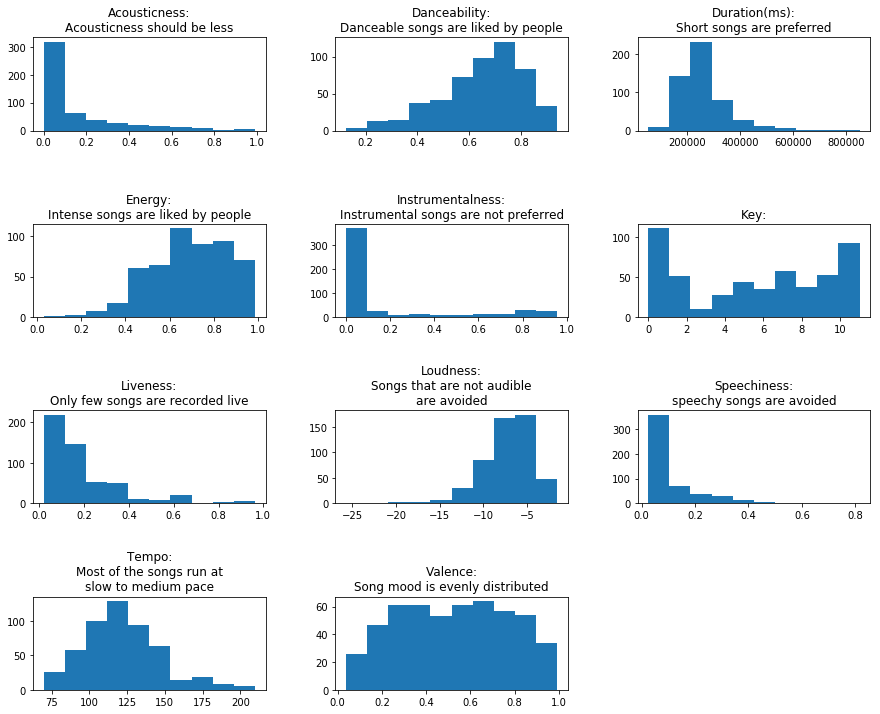

In [9]:
#randomly selcting 1000 values from df
df = df.sample(n = 1000)


fig,axes = plt.subplots(4,3,figsize = (15,12))
plt.subplots_adjust(hspace = 1,wspace= 0.3)

#acousticness
axes[0,0].hist(df[df.target == 1].acousticness.values)
axes[0,0].set_title("Acousticness:\nAcousticness should be less")

#danceability
axes[0,1].set_title("Danceability:\nDanceable songs are liked by people")
axes[0,1].hist(df[df.target == 1].danceability.values)

#duration_ms
axes[0,2].set_title("Duration(ms):\nShort songs are preferred")
axes[0,2].hist(df[df.target == 1].duration_ms.values)

#energy
axes[1,0].set_title("Energy:\nIntense songs are liked by people")
axes[1,0].hist(df[df.target == 1].energy.values)

#instrumentalness
axes[1,1].set_title("Instrumentalness:\nInstrumental songs are not preferred")
axes[1,1].hist(df[df.target == 1].instrumentalness.values)

#key
axes[1,2].set_title("Key:")
axes[1,2].hist(df[df.target == 1].key.values)

#liveness
axes[2,0].set_title("Liveness:\nOnly few songs are recorded live")
axes[2,0].hist(df[df.target == 1].liveness.values)

#loudness
axes[2,1].set_title("Loudness:\nSongs that are not audible\nare avoided")
axes[2,1].hist(df[df.target == 1].loudness.values)

#speechiness
axes[2,2].set_title("Speechiness:\nspeechy songs are avoided")
axes[2,2].hist(df[df.target == 1].speechiness.values)

#tempo
axes[3,0].set_title("Tempo:\nMost of the songs run at\nslow to medium pace")
axes[3,0].hist(df[df.target == 1].tempo.values)

#valence
axes[3,1].set_title("Valence:\nSong mood is evenly distributed")
axes[3,1].hist(df[df.target == 1].valence.values)

#deleting extra axis
fig.delaxes(axes[3,2])
plt.show()

### CHECKING FOR CORRELATION BETWEEN FEATURES 

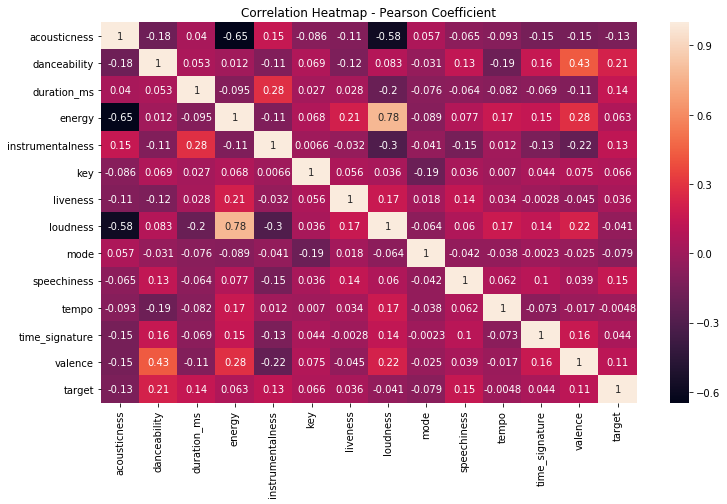

In [10]:
fig1,ax1 = plt.subplots(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,ax=ax1)
ax1.set_title('Correlation Heatmap - Pearson Coefficient')
plt.show()

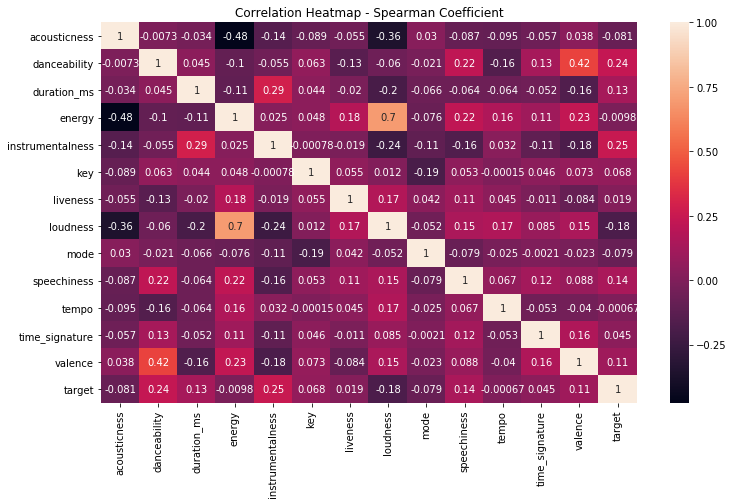

In [11]:
fig1,ax1 = plt.subplots(figsize=(12,7))
sns.heatmap(df.corr(method = 'spearman'),annot=True,ax=ax1)
ax1.set_title('Correlation Heatmap - Spearman Coefficient')
plt.show()

From Pearson and Spearman coefficients we can conclude there exists no strong correlation

=> Positive correlation : energy and loudness(0.68)

=> Negative correlation : acousticness and energy(-0.51)

=> No correlation : All the other columns have almost no correlation with others.

### CHECKING IF THERE ARE ANY OUTLIERS

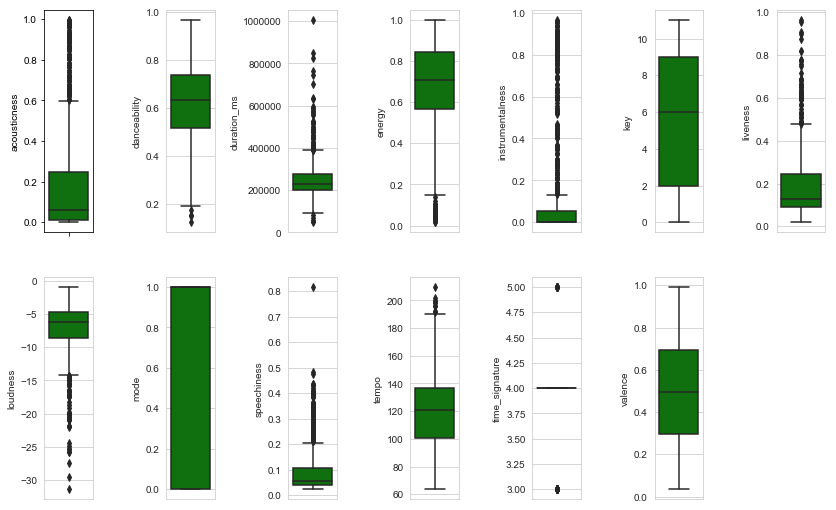

In [12]:
l = df.iloc[:,0:13].columns.values
plt.figure(figsize=(14,9))

for i in range(0,len(l)):
    plt.subplot(2,7,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],orient='v',color = "green")

plt.subplots_adjust(wspace = 1.5)
#     plt.tight_layout()

=> Except key and valence all the columns show outliers

### CHECKING FOR SKEWNESS IN THE DISTRIBUTION

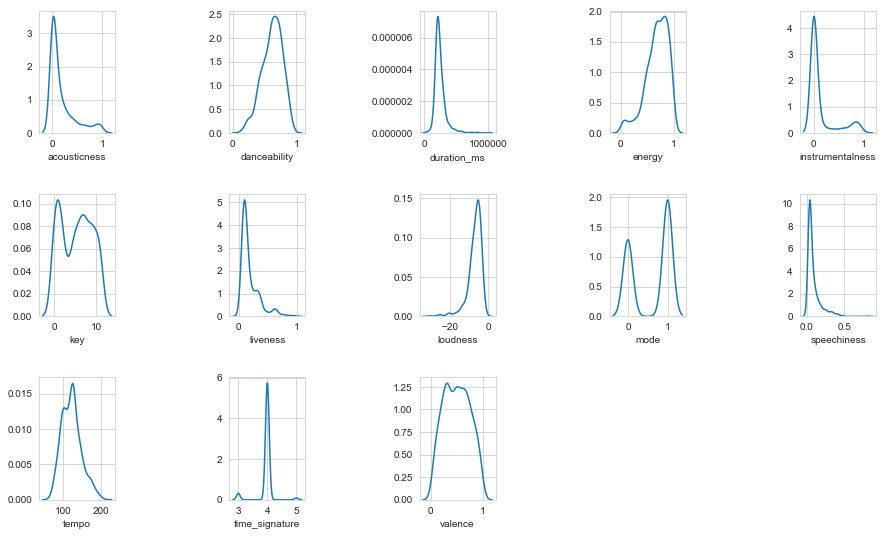

In [13]:
plt.figure(figsize=(15,9))
for i in range(0,len(l)):
    plt.subplot(3,5,i+1)
    sns.distplot(df[l[i]],kde=True,hist= False) 
plt.subplots_adjust(wspace = 1.5,hspace = 0.5)

All the columns are either left or right skewed or bimodally distributed

## PART 2<BR>
## CLASSIFYING THE DATASET

In [14]:
features = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','valence','key','tempo']
x = df[features]
# x.head(1)
y = df.target
# y.head()

### SPLITTING THE DATA INTO TRAIN AND TEST SETS

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

from sklearn import preprocessing
std = preprocessing.StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)


### DECISION TREE MODEL 

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0,max_depth = 10)
model1 = tree.fit(x_train,y_train)

### PREDICTING VALUES AND CONFUSION MATRIX

In [17]:
y_pred1 = model1.predict(x_test)
print([i for i in y_test[0:5]])
print([i for i in y_pred1[0:5]])

[0, 1, 0, 1, 0]
[1, 1, 0, 1, 0]


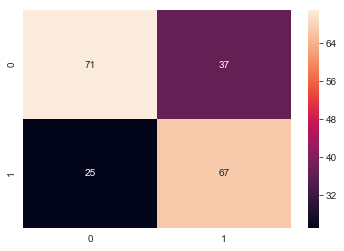

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred1,y_test)
sns.heatmap(confusion_matrix,annot = True)
plt.show()

### ACCURACY OF DECISION TREE MODEL

In [19]:
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
print("accuracy score: ",accuracy_score(y_test, y_pred1))
print("f1 score: ",f1_score(y_test, y_pred1))
print("precision score: ",precision_score(y_test, y_pred1))
print("recall score: ",recall_score(y_test, y_pred1))

accuracy score:  0.69
f1 score:  0.6836734693877551
precision score:  0.7282608695652174
recall score:  0.6442307692307693


The scores are not upto the mark.<br>
But, there is a necessity to build a model with better scores.

### SUPPORT VECTOR MACHINES MODEL

In [20]:
from sklearn.svm import SVC
model2 = SVC(kernel = 'rbf')
model2.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### PREDICTING VALUES AND CONFUSION MATRIX

In [21]:
y_pred2 = model2.predict(x_test)
print([i for i in y_test[0:5]])
print([i for i in y_pred2[0:5]])

[0, 1, 0, 1, 0]
[0, 1, 0, 1, 0]


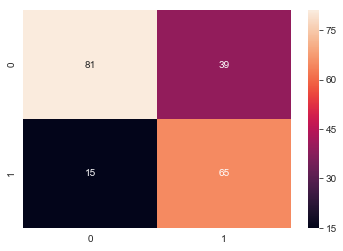

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred2,y_test)
sns.heatmap(confusion_matrix,annot = True)
plt.show()

### ACCURACY OF SVM MODEL

In [23]:
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
print("accuracy score: ",accuracy_score(y_test, y_pred2))
print("f1 score: ",f1_score(y_test, y_pred2))
print("precision score: ",precision_score(y_test, y_pred2))
print("recall score: ",recall_score(y_test, y_pred2))

accuracy score:  0.73
f1 score:  0.7065217391304348
precision score:  0.8125
recall score:  0.625


The scores are not upto the mark.<br>
But, there is a necessity to build a model with better scores.

### ARTIFICIAL NEURAL NETWORKS MODEL

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [25]:
ann = Sequential()

#creating the input layer and the first hidden layer
ann.add(Dense(init = 'uniform', input_dim = 11,output_dim = 6,activation = 'relu'))

# #creating second hidden layer
ann.add(Dense(init = 'uniform',output_dim = 6,activation = 'relu'))

#output layer
ann.add(Dense(init = 'uniform',output_dim = 1,activation = 'sigmoid'))


In [26]:
ann.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

ann.fit(x_train,y_train,batch_size = 5, epochs = 120)

Epoch 1/120
800/800 [==============================] - 1s 692us/step - loss: 0.6928 - acc: 0.5050
Epoch 2/120
800/800 [==============================] - 0s 337us/step - loss: 0.6770 - acc: 0.6100
Epoch 3/120
800/800 [==============================] - 0s 301us/step - loss: 0.6343 - acc: 0.6700
Epoch 4/120
800/800 [==============================] - 0s 313us/step - loss: 0.6095 - acc: 0.6750
Epoch 5/120
800/800 [==============================] - 0s 313us/step - loss: 0.6010 - acc: 0.6875
Epoch 6/120
800/800 [==============================] - 0s 311us/step - loss: 0.5962 - acc: 0.6888
Epoch 7/120
800/800 [==============================] - 0s 320us/step - loss: 0.5938 - acc: 0.6950
Epoch 8/120
800/800 [==============================] - 0s 310us/step - loss: 0.5914 - acc: 0.6975
Epoch 9/120
800/800 [==============================] - 0s 306us/step - loss: 0.5892 - acc: 0.6963
Epoch 10/120
800/800 [==============================] - 0s 309us/step - loss: 0.5875 - acc: 0.7025
Epoch 11/120
800/80

800/800 [==============================] - 0s 308us/step - loss: 0.5056 - acc: 0.7588
Epoch 84/120
800/800 [==============================] - 0s 311us/step - loss: 0.5048 - acc: 0.7650
Epoch 85/120
800/800 [==============================] - 0s 309us/step - loss: 0.5046 - acc: 0.7613
Epoch 86/120
800/800 [==============================] - 0s 306us/step - loss: 0.5058 - acc: 0.7625
Epoch 87/120
800/800 [==============================] - 0s 315us/step - loss: 0.5038 - acc: 0.7663
Epoch 88/120
800/800 [==============================] - 0s 309us/step - loss: 0.5031 - acc: 0.7588
Epoch 89/120
800/800 [==============================] - 0s 305us/step - loss: 0.5043 - acc: 0.7750
Epoch 90/120
800/800 [==============================] - 0s 309us/step - loss: 0.5021 - acc: 0.7650
Epoch 91/120
800/800 [==============================] - 0s 311us/step - loss: 0.5020 - acc: 0.7663
Epoch 92/120
800/800 [==============================] - 0s 303us/step - loss: 0.5024 - acc: 0.7663
Epoch 93/120
800/800 [=

In [27]:
y_pred3 = ann.predict(x_test)
y_pred3 = [int(round(i[0])) for i in y_pred3]
print([i for i in y_test[0:5]])
print([i for i in y_pred3[0:5]])


[0, 1, 0, 1, 0]
[0, 0, 0, 1, 0]


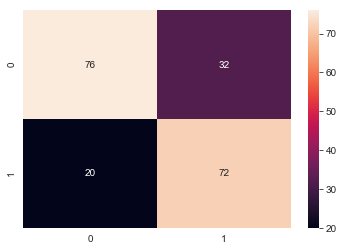

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred3,y_test)
sns.heatmap(confusion_matrix,annot = True)
plt.show()

### ACCURACY OF ANN

In [29]:
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
print("accuracy score: ",accuracy_score(y_pred3,y_test))
print("f1 score: ",f1_score(y_test, y_pred3))
print("precision score: ",precision_score(y_test, y_pred3))
print("recall score: ",recall_score(y_test, y_pred3))

accuracy score:  0.74
f1 score:  0.7346938775510203
precision score:  0.782608695652174
recall score:  0.6923076923076923


- We can very well see ANN has a better accuracy score than the simple ml models.
- But there's an even better chance that the ensemble learner of these three models will have a higher or equal accuracy score